## 02. 영상처리기본연산

In [2]:
#산술 및 논리 연산 예제 (c2_arithmeticLogical.py)

# 관련 라이브러리 선언
import numpy as np
import cv2
from imgRead import imgRead # Code 로 있음, 설치가능 
from createFolder import createFolder


In [ ]:
import cv2

# 영상을 불러오기
def imgRead(imgPath, imgReadType, imgResWidth, imgResHeight):
    img = cv2.imread(imgPath, imgReadType)
    if imgResHeight != 0 | imgResWidth != 0:
        img = cv2.resize(img, (imgResWidth, imgResHeight))
        
    return img


In [31]:
# 영상 읽기
# 이미지 크기 리사이즈 후 통일 

images = []

img1 = imgRead("./images/img1.jpg", cv2.IMREAD_UNCHANGED, 320, 240)
img2 = imgRead("./images/img2.jpg", cv2.IMREAD_UNCHANGED, 320, 240)
img3 = imgRead("./images/img3.jpg", cv2.IMREAD_UNCHANGED, 320, 240)
img4 = imgRead("./images/img4.jpg", cv2.IMREAD_UNCHANGED, 320, 240)
img5 = imgRead("./images/img5.jpg", cv2.IMREAD_GRAYSCALE, 320, 240)


In [32]:
print("img5 shape:", img5.shape)

img5 shape: (240, 320)


In [33]:
# 마스크 선언 및 초기화
mask = np.full(shape=img5.shape, fill_value=0, dtype=np.uint8) # (세로, 가로) -> (240,320)
# mask = (240, 320)
#세로(y), 가로(x)
h, w = img5.shape

x = (int)(w/2) - 60; 
y = (int)(h/2) - 60

#직사각형
cv2.rectangle(mask, (x,y), (x+120, y+120), (255,255,255), -1)
#마스크로 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
print(x) 
print(y)

100
60


In [11]:
mask.shape

(240, 320)

In [12]:
# 산술 및 논리 연산 수행
ress = []
ress.append(cv2.add(img1, img2)) # 코끼리, 
ress.append(cv2.addWeighted(img1, 0.5, img2, 0.5, 0)) # 열화상 , 가증치 0.5 설정 

ress.append(cv2.subtract(img3, img4)) # img3- img4 
ress.append(cv2.absdiff(img3, img4))

ress.append(cv2.bitwise_not(img5)) # 비트연산 수행 
ress.append(cv2.bitwise_and(img5, mask))

In [18]:
# 결과 영상 출력
displays = [("input1", img1),
            ("input2", img2),
            ("input3", img3),
            ("input4", img4),
            ("input5", img5),
            ("res1", ress[0]),
            ("res2", ress[1]),
            ("res3", ress[2]),
            ("res4", ress[3]),
            ("res5", ress[4]),
            ("res6", ress[5]),]


for (name, out) in displays:
    cv2.imshow(name, out)

In [21]:
cv2.imshow('img5', img5)

In [22]:
# 키보드 입력을 기다린 후 모든 영상창 닫기
cv2.waitKey(0)
cv2.destroyAllWindows()


In [34]:
cv2.waitKey(1)

-1

# 밝기(명암비) Contrest 조절 

In [2]:
#영상 명암비 조절 예제 (c2_contrast.py)

import numpy as np
# 관련 라이브러리 선언
import cv2
from imgRead import imgRead
from createFolder import createFolder

# 영상 읽기
img1 = imgRead("./images/img5.jpg", cv2.IMREAD_GRAYSCALE, 320, 240)

In [3]:
# 영상 읽기
img1 = imgRead("./images/img5.jpg", cv2.IMREAD_GRAYSCALE, 320, 240)

In [4]:
# 영상 명암비 조절 변수 선언 및 초기화
multi_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
log_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
invol_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
sel_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)

In [11]:
import math 

print(math.e) # 자연상수 
print(math.log(math.e))
print(np.log(np.e))

2.718281828459045
1.0
1.0


In [14]:
#제곱
print(math.pow(2,3)) # return 실수
print(np.power(2.0,3)) #return 입력값형식동일

8.0
8.0


In [20]:
#제곱 : 2의 3승 
print(2,0 **3)
print(math.pow(2,3))
print(np.power(2,3))

print(np.log(1+255)) #5.545177444479562
print(math.pi)

2 0
8.0
8
5.545177444479562
3.141592653589793


In [22]:
#5를 밑으로하는 25의 로그 
print(math.log(25,5))# 25 = 5 ** 2 

2.0


In [23]:
multi_v = 2 
gamma1 = 0.1 
gamma2= 0.6
thres1 = 5 
thres2 = 100

#로그 , 파워 의 성질을 이용해 명암비를 조절 한다. 
max_v_log = 255 / np.log(1 + 255)   #로그 (자연상수 e 를 밑으로 하는 로그)
max_v_invol = 255 / np.power(255, gamma1) # 제곱 
max_v_sel = 100 / np.power(thres2, gamma2) # 제곱 

In [ ]:
for i in range(256):
    val = i * multi_v
    if val > 255 : val = 255 # val 의 최대값이 255 까지  
    multi_lut[i] = val
    log_lut[i] = np.round(max_v_log * np.log(1+i))
    invol_lut[i] = np.round(max_v_invol * np.power(i, gamma1))
    
    if i < thres1 : sel_lut[i] = i
    elif i > thres2 : sel_lut[i] = i
    else: sel_lut[i] =  np.round(max_v_sel * np.power(i, gamma2))


In [ ]:
# 명암비 조절
#LUT : Look up Table 
# performs a look-up table transform of a array 
# 특정 값에 해당하는 결과 값이 저장 되어 있는 테이블 이다. 
ress = []
ress.append(cv2.LUT(img1, multi_lut)) # Param: Source, LUT, DST :output array 
ress.append(cv2.LUT(img1, log_lut))  # 로그 변환
ress.append(cv2.LUT(img1, invol_lut)) # 거듭 제곱 
ress.append(cv2.LUT(img1, sel_lut))

In [ ]:
# 결과 영상 출력
displays = [("input1", img1),
            ("res1", ress[0]),
            ("res2", ress[1]),
            ("res3", ress[2]),
            ("res4", ress[3])]
for (name, out) in displays:
    cv2.imshow(name, out)


In [ ]:
# 키보드 입력을 기다린 후 모든 영상창 닫기
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 영상 저장
save_dir = './code_res_imgs/c2_contrast'
createFolder(save_dir)
for (name, out) in displays:
    cv2.imwrite(save_dir + "/" + name + ".jpg", out)

In [ ]:
#%%
cv2.waitKey(1)

## 히스토그램 계산 예제 (c_histogram1.py) 

In [29]:
# 관련 라이브러리 선언
import numpy as np
import cv2
from matplotlib import pyplot as plt
from imgRead import imgRead
from createFolder import createFolder

In [30]:
# 영상 읽기
img1 = imgRead("./images/img5.jpg", cv2.IMREAD_GRAYSCALE, 320, 240)

In [31]:
# 히스토그램 계산
ch1 = [0]; ch2 = [0]; ch3 = [0] # 그레이 영상에 대한 3가지 체널 0-5  

ranges1 = [0, 256] # 히스토그램을 구하고자 하는 구간 설정 
ranges2 = [0, 128] # 
ranges3 = [128, 256] # 

# 총 빈(bean)의 갯수  
# 빈과 Ranges 가 동일한 인덱스를 가지지 않는다.(주의)
histSize1 = [256]
histSize2 = [128] 
histSize3 = [128] 

In [32]:
# 히스토그램 계산 
hist1 = cv2.calcHist([img1], ch1, None, histSize1, ranges1) 
hist2 = cv2.calcHist([img1], ch2, None, histSize2, ranges2)
hist3 = cv2.calcHist([img1], ch3, None, histSize3, ranges3)

In [34]:
# 히스토그램 출력 및 저장
bin_x1 = np.arange(256)
bin_x2 = np.arange(128)
bin_x3 = np.arange(128) + 128

(0.0, 255.0)

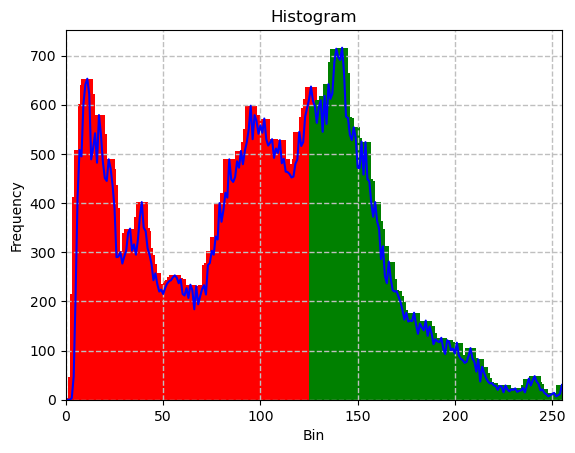

In [35]:
plt.title("Histogram")
plt.xlabel("Bin")
plt.ylabel("Frequency")

plt.plot(bin_x1, hist1, color='b')
plt.bar(bin_x2, hist2[:,0], width=6,color='r')
plt.bar(bin_x3, hist3[:,0], width=6,color='g')

plt.grid(True, lw = 1, ls = '--', c= '.75')
plt.xlim([0,255])

In [36]:
# 영상 저장
save_dir = './code_res_imgs/c2_histogram1'
createFolder(save_dir)
plt.savefig(save_dir + "/" + "hist.png")

plt.show()

<Figure size 640x480 with 0 Axes>

# 히스토그램 평활화 예제 (c2_histogramEqualization.py)

In [37]:
# 영상 읽기
img1 = imgRead("./images/img6.jpg", cv2.IMREAD_GRAYSCALE, 320, 240)

In [38]:
#히스토그램 평활화 및 히스토그램 계산
res1 = cv2.equalizeHist(img1)
ch1 = [0]; ranges1 = [0, 256]; histSize1 = [256]
hist1 = cv2.calcHist([img1], ch1, None, histSize1, ranges1)
hist2 = cv2.calcHist([res1], ch1, None, histSize1, ranges1)

In [ ]:
#상수곱, 로그곱, 거급제곱 변환 기반 명암비 조절 및 히스토그램 계산
multi_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
log_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
invol1_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
multi_v = 2; gamma1 = 0.4
thres1 = 5; thres2 = 100
max_v_log = 255 / np.log(1 + 255)
max_v_invol1 = 255 / np.power(255, gamma1)

for i in range(256):
    val = i * multi_v
    if val > 255 : val = 255
    multi_lut[i] = val
    log_lut[i] = np.round(max_v_log * np.log(1+i))
    invol1_lut[i] = np.round(max_v_invol1 * np.power(i, gamma1))


In [ ]:
# 명암비 조절
res2 = cv2.LUT(img1, multi_lut)
res3 = cv2.LUT(img1, log_lut)
res4 = cv2.LUT(img1, invol1_lut)

hist3 = cv2.calcHist([res2], ch1, None, histSize1, ranges1)
hist4 = cv2.calcHist([res3], ch1, None, histSize1, ranges1)
hist5 = cv2.calcHist([res4], ch1, None, histSize1, ranges1)

In [ ]:
# 히스토그램 출력 및 결과 저장
bin_x = np.arange(256)
fig_index = 0

save_dir = './code_res_imgs/c2_histogramEqualization'

createFolder(save_dir)
display_img = [("input1", img1),
            ("res1", res1),
            ("res2", res2),
            ("res3", res3),
            ("res4", res4)]

for (name, out) in display_img:
    cv2.imshow(name, out)
    cv2.imwrite(save_dir + "/" + name + ".jpg", out)

dlsplay_hist = [("Input Histogram", hist1),
                ("Equalization-convert Histogram", hist2),
                ("Multiply-convert Histogram", hist3),
                ("log-convert Histogram", hist4),
                ("Invil-convert Histogram", hist5)]

for (name, out) in dlsplay_hist:
    plt.figure(fig_index)
    plt.title(name); plt.xlabel("Bin"); plt.ylabel("Frequency")
    plt.bar(bin_x, out[:,0], width=6, color='g')
    plt.grid(True, lw=1, ls='--', c='.75')
    plt.xlim([0, 255])
    plt.savefig(save_dir + "/" + name + ".png")
    fig_index += 1


plt.show()

In [ ]:
# 키보드 입력을 기다린 후 모든 영상창 닫기
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.waitKey(1)

In [ ]:
# 히스토그램 역투영 예제 (c2_histogramBackprojection.py)

In [ ]:
# 영상 읽기
img1 = imgRead("./images/img7.jpg", cv2.IMREAD_UNCHANGED, 320, 240)

In [ ]:
# 컬러 공간 변환 및 채널 분할
img1_HSV = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img1_H, img1_S, img1_V = cv2.split(img1_HSV)

In [ ]:
# 입력 히스토그램 생성
ch1 = [0]; ranges1 = [0, 256]; histSize1 = [256]; bin_x1 = np.arange(256)
mask1 = img1_H[110:150, 200:240]
hist_mask = cv2.calcHist([mask1], ch1, None, histSize1, ranges1)

In [ ]:
# 히스토그램 역투영 수행
bp = cv2.calcBackProject([img1_H], ch1, hist_mask, ranges1, 1)

In [ ]:
# 결과영상
ret1, res1 = cv2.threshold(bp, 0, 255, cv2.THRESH_BINARY)
mask2 = np.full(shape=img1.shape, fill_value=0, dtype=np.uint8)
mask2[:,:,0] = res1; mask2[:,:,1] = res1; mask2[:,:,2] = res1
res2 = cv2.bitwise_and(img1, mask2)

In [ ]:
cv2.rectangle(img1, (200, 110), (240, 150), (255, 255, 255), 2) #마스크 박스 치기 
cv2.imshow("img1+mask", img1)
cv2.imshow("res1(binary)", res1)
cv2.imshow("res1(overlap)", res2)

In [ ]:
# 히스토그램 출력 및 결과 저장
save_dir = './code_res_imgs/c4_3'
createFolder(save_dir)
cv2.imwrite(save_dir + "/" + "input1.png", img1)
cv2.imwrite(save_dir + "/" + "res1.png", res1)
cv2.imwrite(save_dir + "/" + "res2.png", res2)

In [ ]:
hist_Hue = cv2.calcHist([img1_H], ch1, None, histSize1, ranges1)
hist_res = cv2.calcHist([bp], ch1, None, histSize1, ranges1)
displays = [("Input Histogram", hist_Hue, 0, np.arange(256), 1),
            ("Mask Histogram", hist_mask, 0, np.arange(256), 2),
            ("Res Histogram", hist_res, 1, np.arange(255), 3)]

In [ ]:
for (name, out, hist_index, hist_bins, index) in displays:
    plt.figure(index)
    plt.title(name); plt.xlabel("Bin"); plt.ylabel("Frequency")
    plt.bar(hist_bins, out[hist_index:, 0], width=6, color='g')
    plt.grid(True, lw=1, ls='--', c='.75')
    plt.xlim([0, 255])
    plt.savefig(save_dir + "/" + name + ".png")

In [ ]:
plt.show()

# 키보드 입력을 기다린 후 모든 영상창 닫기
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.waitKey(1)